In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from games import CongestionGame

In [6]:
game = CongestionGame(cost_setup=(40,15,0.1,65), n_agents=200, intelligent=True)
game.play(n_stages=10, n_iterations=10)

100%|██████████| 10/10 [00:31<00:00,  3.17s/it]


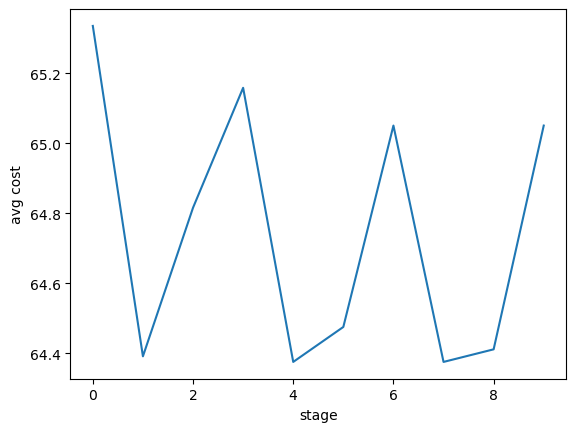

In [12]:
x = [stage[2] for stage in game.run_history]
# plot n_iter as a function of stage
plt.plot(x)
plt.xlabel('stage')
plt.ylabel('avg cost')
plt.show()

In [13]:
np.mean(x)

64.74400000000009

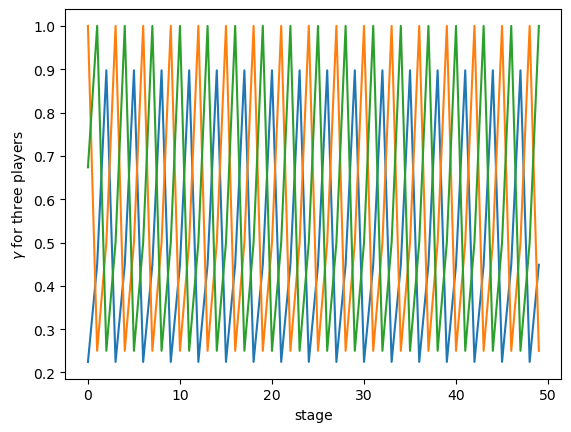

In [12]:
g = np.array([[stage[3][i][0] for stage in game.run_history] for i in [0,1,4]])
# plot n_iter as a function of stage
plt.plot(g.transpose())
plt.xlabel('stage')
plt.ylabel('$\gamma$ for three players')
plt.show()

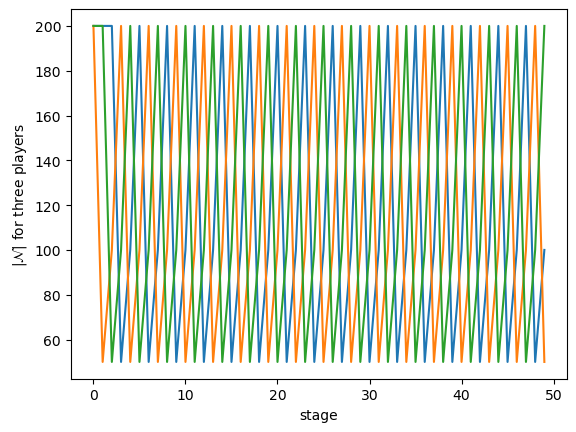

In [13]:
num = np.array([[stage[3][i][1] for stage in game.run_history] for i in [0,1,4]])
# plot n_iter as a function of stage
plt.plot(num.transpose())
plt.xlabel('stage')
plt.ylabel('$|\mathcal{N}|$ for three players')
plt.show()

Generating cost over parameter sapce

In [14]:
record = []

gamma_range = np.arange(0, 1.01, 0.1)
neigh_range = list(range(0, 200, 25)) + [199]

pbar = tqdm(neigh_range)
for n_neighbours in pbar:
    for gamma in gamma_range:
        pbar.set_description(f'gamma = {gamma:.2f}, n = {n_neighbours}')
        game = CongestionGame(cost_setup=(40,15,0.1,65), n_agents=200, agent_setup=(n_neighbours, gamma))
        game.play(n_stages=10, n_iterations=10, verbose=False)
        record.append([n_neighbours, gamma, np.mean([stage[2] for stage in game.run_history])])

gamma = 0.80, n = 100:  44%|████▍     | 4/9 [29:53<04:14, 50.80s/it]